In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')

#Converting pandas into numpy array
x = x.values
y = y.values

In [3]:
x_test = pd.read_csv('Linear_X_Test.csv')

In [4]:
print(x.shape,y.shape)

(3750, 1) (3750, 1)


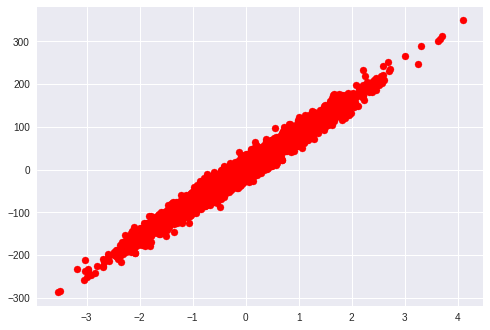

In [5]:
plt.style.use('seaborn')
plt.scatter(x,y,color='red')
plt.show()

In [6]:
#Normalistaion(mean/standard deviation)
u=x.mean()
std= x.std()
x=(x-u)/std
print(x)

[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ...
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]


In [7]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(x,y,theta):
    m = x.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        y_ = hypothesis(x[i],theta)
        X=x[i]
        Y=y[i]
        grad[0] += (y_ - Y)
        grad[1] += (y_ - Y)*X
        
    return grad/(2*m)

def error(x,y,theta):
    m = x.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(x[i],theta)
        total_error += (y_ - y[i])**2
        
    return total_error/m
    
def gradient_descent(x,y,epochs = 100 , lr = 0.1):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(epochs):
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta,error_list

In [8]:
theta , error_list = gradient_descent(x,y)


In [9]:
print(theta)
error_list = pd.DataFrame(error_list)
error_list

[ 0.6798201  79.43265269]


,0
0,6576.350052
1,5953.774091
2,5391.899286
3,4884.807275
4,4427.156735
...,...
95,191.329408
96,191.292960
97,191.260065
98,191.230378


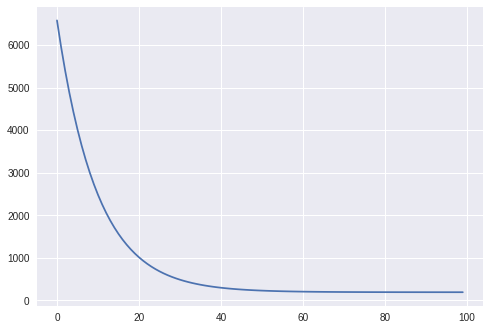

In [10]:
plt.plot(error_list)
plt.show()

In [11]:
y_pred = hypothesis(x_test,theta)
y_ = hypothesis(x,theta)
y_pred

,x
0,-148.490286
1,-68.349690
2,-200.299282
3,219.930261
4,47.624528
...,...
1245,-12.669511
1246,74.728730
1247,10.847821
1248,-21.405443


In [12]:
#Training accuracy 

def r2score(y,y_):
    
    num = np.sum((y - y_)**2)
    den = np.sum((y - y.mean())**2)

    score = (1 - (num/den))

    return score*100


In [13]:
r2score(y,y_)

97.0927186109571

In [14]:
#comparing our model with sklearn model
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# print the bias and weights
print("Weights :"+str(lr.coef_))
print("Bias :"+ str(lr.intercept_))

Weights :[[79.90573694]]
Bias :[0.68386897]


In [17]:
pred = lr.predict(x_test)
pred=pd.DataFrame(pred)
pred

,0
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170
...,...
1245,-12.744968
1246,75.173799
1247,10.912428
1248,-21.532930


In [18]:
pred.to_csv('hardwork.csv',index=False)